In [ ]:
!pip install pysiology

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#@title Fix
import os,shutil
os.remove("/usr/local/lib/python3.10/dist-packages/pysiology/electromyography.py")
shutil.move("/content/electromyography.py","/usr/local/lib/python3.10/dist-packages/pysiology/electromyography.py")

'/usr/local/lib/python3.10/dist-packages/pysiology/electromyography.py'

In [ ]:
! wget -r -N -c -np https://physionet.org/files/gaitndd/1.0.0/

In [ ]:
import pysiology
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os,shutil

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore. https://doi.org/10.1007/978-981-13-8950-4_35


In [ ]:
#EDA
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
# from mlxtend.classifier import StackingCVClassifier

In [ ]:
data_1 = pd.read_csv("physionet.org/files/gaitndd/1.0.0/als1.ts",delimiter="\t",names=["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)",
                                                      "Right Swing Interval (sec)","Left Swing Interval (% of stride)","Right Swing Interval (% of stride)",
                                                      "Left Stance Interval (sec)","Right Stance Interval (sec)","Left Stance Interval (% of stride)",
                                                      "Right Stance Interval (% of stride)","Double Support Interval (sec)","Double Support Interval (% of stride)"])

data_1.head()

In [ ]:
dataset_path = "physionet.org/files/gaitndd/1.0.0"
dict_data = {'MNF': [], 'MDF': [],'PeakFrequency': [], 'MNP': [],'TTP': [], 'SM1': [],'SM2': [], 'SM3': []
  ,'FR': [], 'PSR': [], 'VCF': [],'IEMG': [], 'MAV': [], 'MAV1': [], 
 'MAV2': [], 'SSI': [], 'VAR': [], 'TM3': [], 'TM4': [], 'TM5': [],  
 'LOG': [], 'RMS': [], 'WL': [], 'AAC': [], 'DASDV': [], 'ZC': [], 'MYOP':[],   
 'WAMP': [], 'SSC': [], 'MAVSLPk1':[],"MAVSLPk2":[],"MAVSLPk3":[],"label":[]}
  
folders = [os.path.join(dataset_path, folder_name) for folder_name in os.listdir(dataset_path) if str(folder_name).endswith(".ts")]  
  
labels = ["als","control","hunt","park"]
for folder in folders:  
  if(re.split("\d", str(folder.split("/")[4]))[0] != "example"):
    df = pd.read_csv(folder,delimiter="\t",names=["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)",  
                                                      "Right Swing Interval (sec)","Left Swing Interval (% of stride)","Right Swing Interval (% of stride)",  
                                                      "Left Stance Interval (sec)","Right Stance Interval (sec)","Left Stance Interval (% of stride)",  
                                                      "Right Stance Interval (% of stride)","Double Support Interval (sec)","Double Support Interval (% of stride)"])
    target = ["Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)","Right Swing Interval (sec)",
              "Left Stance Interval (sec)","Right Stance Interval (sec)","Double Support Interval (sec)"] 
    label = labels.index(re.split("\d", str(folder.split("/")[4]))[0]) 
    for f in target:
      data = df[f]
      analyzedEMG = pysiology.electromyography.analyzeEMGnew(data,samplerate=200,preprocessing=False) 
      time,freq = analyzedEMG

      freq = analyzedEMG[freq]
      keys1 = list(freq.keys())

      for i in keys1 :
        dict_data[i].append(freq[i])

      time = analyzedEMG[time]
      keys2 = list(time.keys())[:-1]

      for i in keys2 :
        dict_data[i].append(time[i])

      dict_data["MAVSLPk1"].append(time["MAVSLPk"][0])
      dict_data["MAVSLPk2"].append(time["MAVSLPk"][1])
      dict_data["MAVSLPk3"].append(time["MAVSLPk"][2])
      dict_data["label"].append(label)

dataFrame = pd.DataFrame(dict_data)

In [ ]:
dataFrame

,MNF,MDF,PeakFrequency,MNP,TTP,SM1,SM2,SM3,PSR,VCF,...,RMS,WL,AAC,DASDV,WAMP,SSC,MAVSLPk1,MAVSLPk2,MAVSLPk3,label
0,55.419204,60.937500,75.781250,0.000111,0.014313,0.793197,0.000176,4.942895e-08,0.552705,-3071.275897,...,1.044045,28.2608,0.105451,0.018327,127,171,1.028727,1.048461,1.043709,2
1,46.417276,41.406250,96.875000,0.000068,0.008791,0.408057,0.000055,1.099079e-08,0.286842,-2154.557254,...,1.042973,21.2560,0.079313,0.010138,127,159,1.027678,1.049776,1.042400,2
2,47.624864,42.968750,18.750000,0.000037,0.004753,0.226361,0.000014,1.280866e-09,0.490085,-2268.124730,...,0.377396,15.0539,0.056171,0.005335,128,150,0.372582,0.376030,0.371424,2
3,58.367037,63.281250,82.031250,0.000051,0.006575,0.383741,0.000048,1.005752e-08,0.552740,-3406.703588,...,0.272121,19.9717,0.074521,0.009346,119,175,0.275317,0.264978,0.254756,2
4,56.565354,61.718750,87.500000,0.000079,0.010210,0.577510,0.000094,1.970993e-08,0.506859,-3199.630143,...,0.671264,23.8004,0.088807,0.013067,122,175,0.656143,0.672436,0.672284,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,45.690739,52.577320,2.061856,0.000047,0.004592,0.209827,0.000016,1.861566e-09,0.414700,-2087.640062,...,0.428809,8.8702,0.045723,0.005040,75,112,0.427869,0.411197,0.439009,0
444,56.467415,61.855670,2.061856,0.000028,0.002701,0.152535,0.000007,3.885592e-10,0.225227,-3188.566401,...,0.393196,5.6602,0.029176,0.003460,76,119,0.388441,0.383534,0.402183,0
445,50.043560,52.577320,3.092784,0.002204,0.216023,10.810550,0.027303,7.751657e-05,0.356280,-2504.231517,...,0.933596,19.0994,0.098451,0.226049,85,107,0.928752,0.818748,0.869166,0
446,40.622414,37.113402,3.092784,0.002015,0.197486,8.022370,0.015042,3.434915e-05,0.438603,-1650.104383,...,0.960611,17.2063,0.088692,0.159189,87,110,0.967816,0.846981,0.907030,0


In [ ]:
dataFrame.iloc[:60,:16]

In [ ]:
dataFrame.iloc[:60,16:]

In [ ]:
dataFrame.columns

Index(['MNF', 'MDF', 'PeakFrequency', 'MNP', 'TTP', 'SM1', 'SM2', 'SM3', 'PSR',
       'VCF', 'IEMG', 'MAV', 'MAV1', 'MAV2', 'SSI', 'VAR', 'TM3', 'TM4', 'TM5',
       'LOG', 'RMS', 'WL', 'AAC', 'DASDV', 'WAMP', 'SSC', 'MAVSLPk1',
       'MAVSLPk2', 'MAVSLPk3', 'label'],
      dtype='object')

In [ ]:
dataFrame =  dataFrame.drop(columns='FR')
dataFrame =  dataFrame.drop(columns='ZC')
dataFrame =  dataFrame.drop(columns='MYOP')

In [ ]:
# !pip -q install dataprep

In [ ]:

# from dataprep.eda import plot, plot_correlation, plot_missing,create_db_report,create_report
# report = create_report(dataFrame)
# report

In [ ]:
dataFrame["label"].unique()

array([2, 1, 0, 3])

In [ ]:
  als = dataFrame[dataFrame.label == 0]
  control = dataFrame[dataFrame.label==1]
  hunt = dataFrame[dataFrame.label==2]
  park = dataFrame[dataFrame.label==3]

In [ ]:
def plot_scatter(x,y):
  fig, ax = plt.subplots()
  fig.set_size_inches(13, 7) 
  # lables and scatter points
  ax.scatter(als[x], als[y], label="als", facecolor="blue")
  ax.scatter(control[x], control[y], label="control", facecolor="green")
  ax.scatter(hunt[x], hunt[y], label="hunt", facecolor="red")
  ax.scatter(park[x], park[y], label="park", facecolor="Yellow")
  ax.set_xlabel(x)
  ax.set_ylabel(y)
  ax.grid()
  ax.set_title("")
  ax.legend()

In [ ]:
plot_scatter('MNF', 'MDF')

In [ ]:
plot_scatter('WL', 'AAC')

In [ ]:
# plt.figure(figsize=(50,50))
# sns.heatmap(dataFrame.corr())

# Main function

In [54]:
def Main(dataFrame,columns):
    models = {
        'Logistic Regression':LogisticRegression(max_iter=5000,solver='lbfgs', fit_intercept=True,intercept_scaling=1),
        "Naive Bayes":GaussianNB( var_smoothing=1e-018),
        'Support Vector ':SVC(kernel='rbf', C=2, max_iter=-1),
        "Decision Tree":DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 32),
        "Random Forest": RandomForestClassifier(n_estimators=26, random_state=2,max_depth=5),
        "K-Neighbors":KNeighborsClassifier(n_neighbors=16),
        "Extreme Gradient Boost":XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),
        "Ada Boost":AdaBoostClassifier(n_estimators=500, learning_rate = 0.75),
        "LDA":LinearDiscriminantAnalysis(),
        "MLP":MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,solver='sgd',  random_state=21,tol=0.000000001)
    }
    acc_score={}
    colors = ['red','green','blue','Cyan','Lime','yellow','orange',"DeepPink","OrangeRed","DarkMagenta"]
    y, X = dataFrame['label'], dataFrame.loc[:,columns].astype('float64')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    score = []
    models_names = list(models.keys())
    for i in models_names:
      models[i].fit(X_train, y_train)
      predict = models[i].predict(X_test)
      acc = accuracy_score(y_test, predict)
      score.append(acc*100)
    acc_score["Model"] = models_names
    acc_score["Accuracy"] = score
    frame =  pd.DataFrame(acc_score)
    plt.figure(figsize=(20,10))
    plt.title("barplot Represent Accuracy of different models")
    plt.xlabel("Algorithms")
    plt.ylabel("Accuracy %")
    plt.bar(frame['Model'],frame['Accuracy'],color = colors)
    plt.show()
    return [frame,models.copy()]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


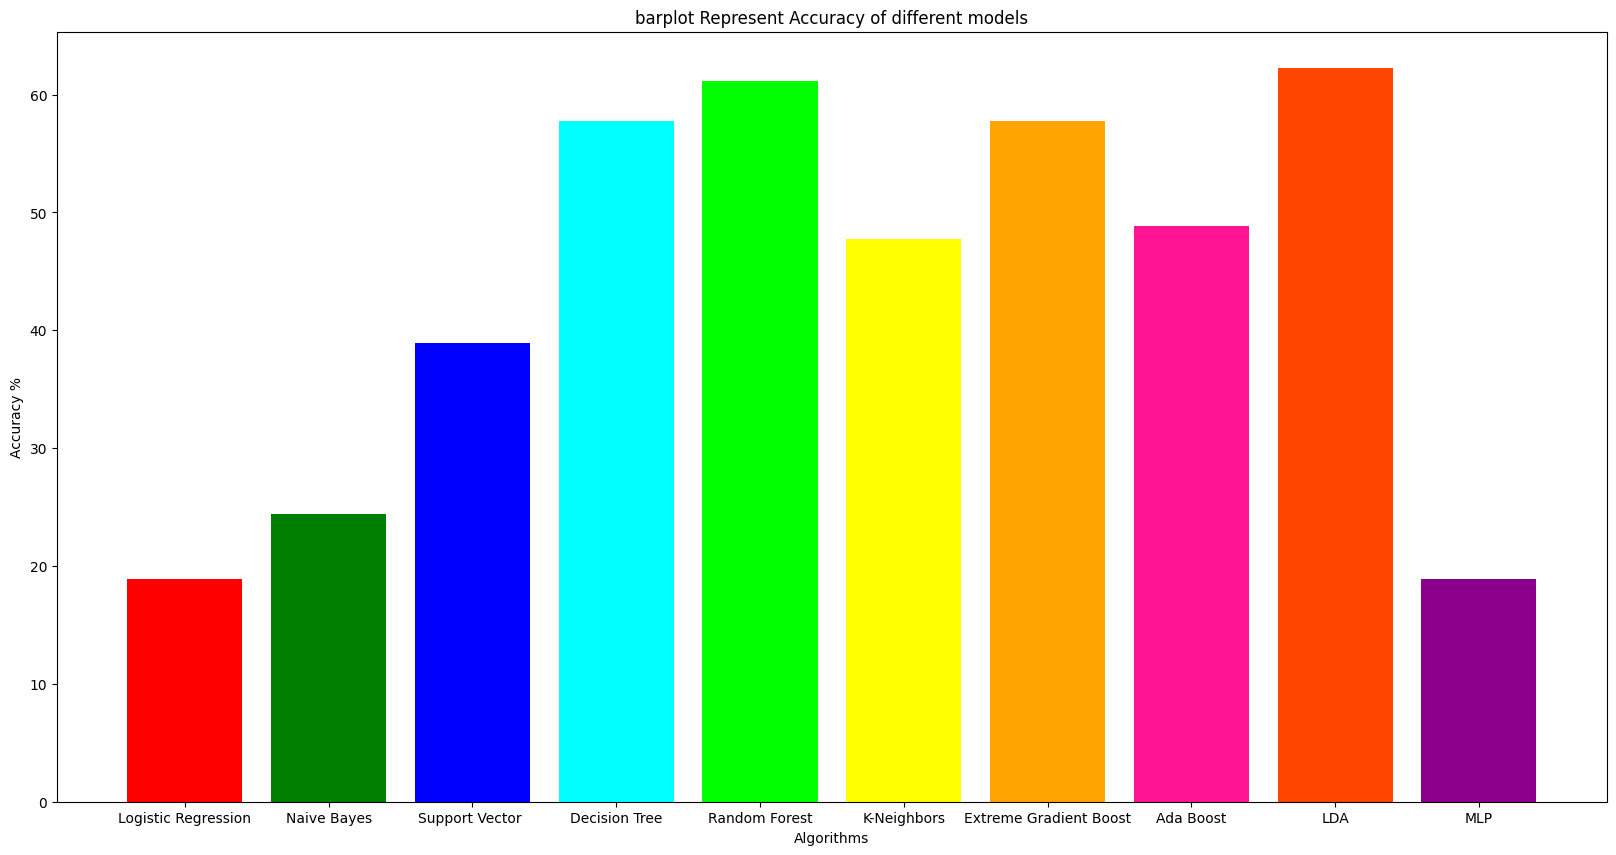

[                    Model   Accuracy
 0     Logistic Regression  18.888889
 1             Naive Bayes  24.444444
 2         Support Vector   38.888889
 3           Decision Tree  57.777778
 4           Random Forest  61.111111
 5             K-Neighbors  47.777778
 6  Extreme Gradient Boost  57.777778
 7               Ada Boost  48.888889
 8                     LDA  62.222222
 9                     MLP  18.888889,
 {'Logistic Regression': LogisticRegression(max_iter=5000),
  'Naive Bayes': GaussianNB(var_smoothing=1e-18),
  'Support Vector ': SVC(C=2),
  'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=32, random_state=0),
  'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=26, random_state=2),
  'K-Neighbors': KNeighborsClassifier(n_neighbors=16),
  'Extreme Gradient Boost': XGBClassifier(base_score=None, booster='dart', callbacks=None,
                colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
                early_stoppi

In [63]:
Main(dataFrame,dataFrame.columns[:-1])

In [ ]:
def filter(dataFrame,name):
    min = dataFrame[name].min().astype('float64')
    std = dataFrame[name].std().astype('float64')
    data = dataFrame.loc[:,[name,'label']].astype('float64')
    for x in data.index:
      if data.loc[x, name] > min+std or data.loc[x, name] < min-std:
        data.drop(x, inplace = True)
    return data

def MainoneByone(dataFrame):
    models = {
        'Logistic Regression':LogisticRegression(max_iter=5000,solver='lbfgs', fit_intercept=True,intercept_scaling=1),
        "Naive Bayes":GaussianNB( var_smoothing=1e-018),
        'Support Vector ':SVC(kernel='rbf', C=2, max_iter=-1),
        "Decision Tree":DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 32),
        "Random Forest": RandomForestClassifier(n_estimators=26, random_state=2,max_depth=5),
        "K-Neighbors":KNeighborsClassifier(n_neighbors=16),
        "Extreme Gradient Boost":XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),
        "Ada Boost":AdaBoostClassifier(n_estimators=500, learning_rate = 0.75),
        "LDA":LinearDiscriminantAnalysis(),
        "MLP":MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,solver='sgd',  random_state=21,tol=0.000000001)
    }
    columns = list(dataFrame.columns)
    data={  
        "feature":[],
        'Logistic Regression':[],  
        "Naive Bayes":[],
        'Support Vector ':[],   
        "Decision Tree":[],
        "Random Forest": [],  
        "K-Neighbors":[],
        "Extreme Gradient Boost":[],    
        "Ada Boost":[],
        "LDA":[], 
        "MLP":[],   
    }  
    reject =[]
    models_names = list(models.keys())  
    for j in columns[:-1]:  
      copy_model = models.copy()  
      # filter 

      df =  filter(dataFrame,j) 
      
      if (len(df.index) > 100):
        y, X = df['label'], df[[j]].astype('float64') 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
        for i in models_names: 
            copy_model[i].fit(X_train, y_train)      
            predict = copy_model[i].predict(X_test)   
            acc = accuracy_score(y_test, predict)     
            data[i].append(acc*100)  
        data["feature"].append(j)   
      else: 
        reject.append(j)
    frame =  pd.DataFrame(data)  
    return [frame,reject]  

[acuuracy,rejected] = MainoneByone(dataFrame)

In [71]:
acuuracy

,feature,Logistic Regression,Naive Bayes,Support Vector,Decision Tree,Random Forest,K-Neighbors,Extreme Gradient Boost,Ada Boost,LDA,MLP
0,PeakFrequency,29.577465,29.577465,32.394366,61.971831,56.338028,45.070423,52.112676,45.070423,29.577465,30.985915
1,MNP,38.202247,32.584270,40.449438,33.707865,39.325843,42.696629,40.449438,39.325843,39.325843,38.202247
2,TTP,34.444444,35.555556,37.777778,43.333333,50.000000,48.888889,51.111111,45.555556,34.444444,35.555556
3,SM1,39.080460,28.735632,28.735632,37.931034,35.632184,43.678161,37.931034,34.482759,39.080460,40.229885
4,SM2,33.333333,32.222222,36.666667,43.333333,45.555556,45.555556,42.222222,41.111111,33.333333,34.444444
5,SM3,33.333333,31.111111,35.555556,36.666667,37.777778,48.888889,42.222222,31.111111,33.333333,33.333333
6,PSR,35.227273,38.636364,36.363636,28.409091,34.090909,39.772727,35.227273,32.954545,35.227273,35.227273
7,IEMG,33.333333,33.333333,33.333333,23.333333,33.333333,37.777778,32.222222,34.444444,33.333333,34.444444
8,MAV,33.333333,34.444444,35.555556,44.444444,38.888889,37.777778,38.888889,31.111111,32.222222,38.888889
9,MAV1,33.333333,34.444444,37.777778,41.111111,36.666667,38.888889,38.888889,35.555556,32.222222,34.444444


In [72]:
rejected

['MNF', 'MDF', 'VCF', 'WAMP', 'SSC']

In [74]:
for i in rejected:
  dataFrame =  dataFrame.drop(columns=i)

# train on all column without the rejected

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


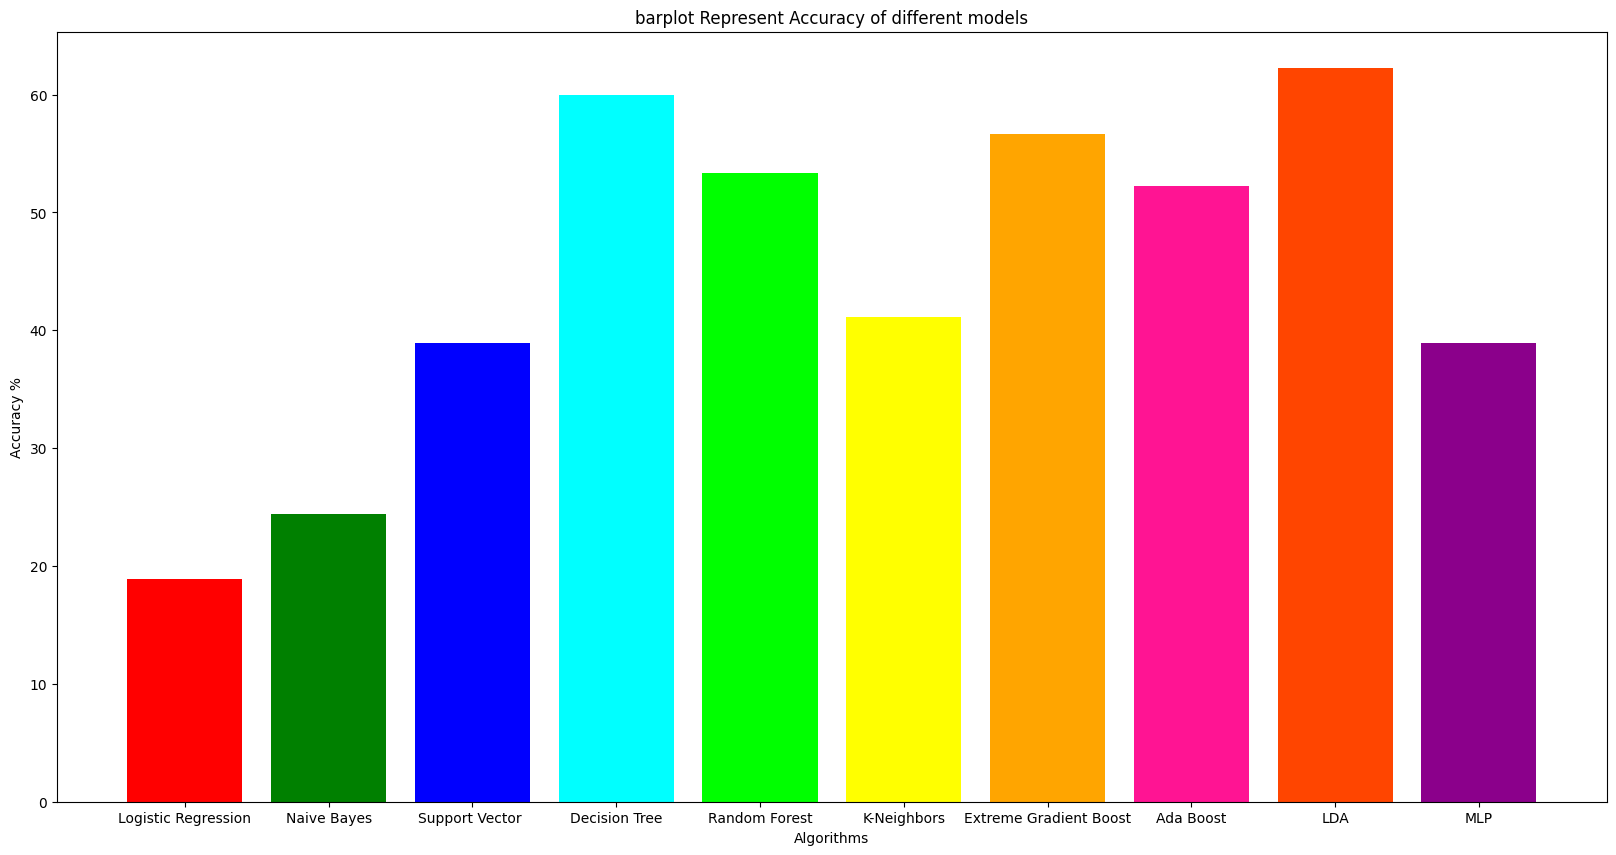

[                    Model   Accuracy
 0     Logistic Regression  18.888889
 1             Naive Bayes  24.444444
 2         Support Vector   38.888889
 3           Decision Tree  60.000000
 4           Random Forest  53.333333
 5             K-Neighbors  41.111111
 6  Extreme Gradient Boost  56.666667
 7               Ada Boost  52.222222
 8                     LDA  62.222222
 9                     MLP  38.888889,
 {'Logistic Regression': LogisticRegression(max_iter=5000),
  'Naive Bayes': GaussianNB(var_smoothing=1e-18),
  'Support Vector ': SVC(C=2),
  'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=32, random_state=0),
  'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=26, random_state=2),
  'K-Neighbors': KNeighborsClassifier(n_neighbors=16),
  'Extreme Gradient Boost': XGBClassifier(base_score=None, booster='dart', callbacks=None,
                colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
                early_stoppi

In [77]:
Main(dataFrame,dataFrame.columns[:-1])

# filter and concatenate multi column 

In [76]:
def filtermultiColumn(dataFrame,selected_features):
  std={}
  min={}
  for i in selected_features:
    min[i] = dataFrame[i].min().astype('float64')
    std[i] =dataFrame[i].std().astype('float64')
  selected_features.append("label")
  df = dataFrame[selected_features]
  for i in selected_features[:-1]:
    for j in df[i].index:
      if df.loc[j, i] > min[i]+std[i] or df.loc[j, i] < min[i]-std[i]:
        df = df.drop(j)
  return df

# feature_selection SequentialFeatureSelector

In [79]:
from sklearn.svm import SVR
from sklearn.feature_selection import SequentialFeatureSelector

y, X = dataFrame['label'], dataFrame.drop(columns='label').astype('float64')


knn = KNeighborsClassifier(n_neighbors=10)
sfs = SequentialFeatureSelector(knn, n_features_to_select=10)
sfs.fit(X, y)
selected_features = list(X.columns[sfs.get_support()])
selected_features

['MNP', 'TTP', 'SM2', 'SM3', 'MAV1', 'MAV2', 'TM5', 'WL', 'AAC', 'DASDV']

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


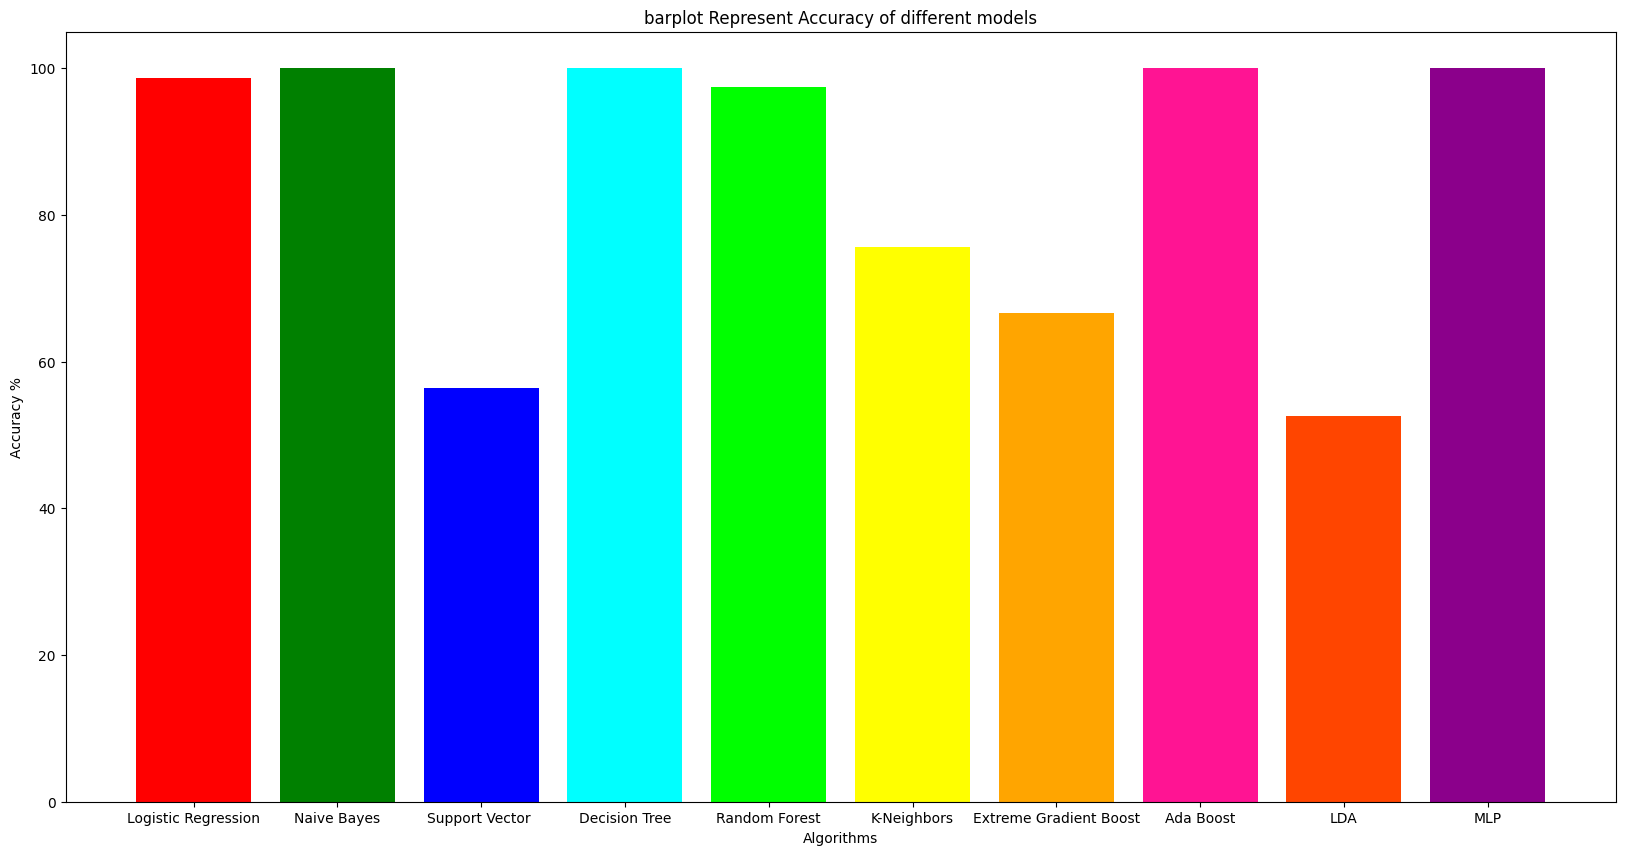

[                    Model    Accuracy
 0     Logistic Regression   98.717949
 1             Naive Bayes  100.000000
 2         Support Vector    56.410256
 3           Decision Tree  100.000000
 4           Random Forest   97.435897
 5             K-Neighbors   75.641026
 6  Extreme Gradient Boost   66.666667
 7               Ada Boost  100.000000
 8                     LDA   52.564103
 9                     MLP  100.000000,
 {'Logistic Regression': LogisticRegression(max_iter=5000),
  'Naive Bayes': GaussianNB(var_smoothing=1e-18),
  'Support Vector ': SVC(C=2),
  'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=32, random_state=0),
  'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=26, random_state=2),
  'K-Neighbors': KNeighborsClassifier(n_neighbors=16),
  'Extreme Gradient Boost': XGBClassifier(base_score=None, booster='dart', callbacks=None,
                colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
                e

In [81]:
data1 = filtermultiColumn(dataFrame,selected_features)
Main(data1,selected_features)

# feature selection RFECV

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
y, X = dataFrame['label'], dataFrame.drop(columns='label').astype('float64')
estimator =LogisticRegression()

selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)

selected_features2 = list(X.columns[selector.support_])


In [83]:
selected_features2

['RMS', 'WL', 'AAC', 'DASDV', 'MAVSLPk1', 'MAVSLPk2', 'MAVSLPk3']

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


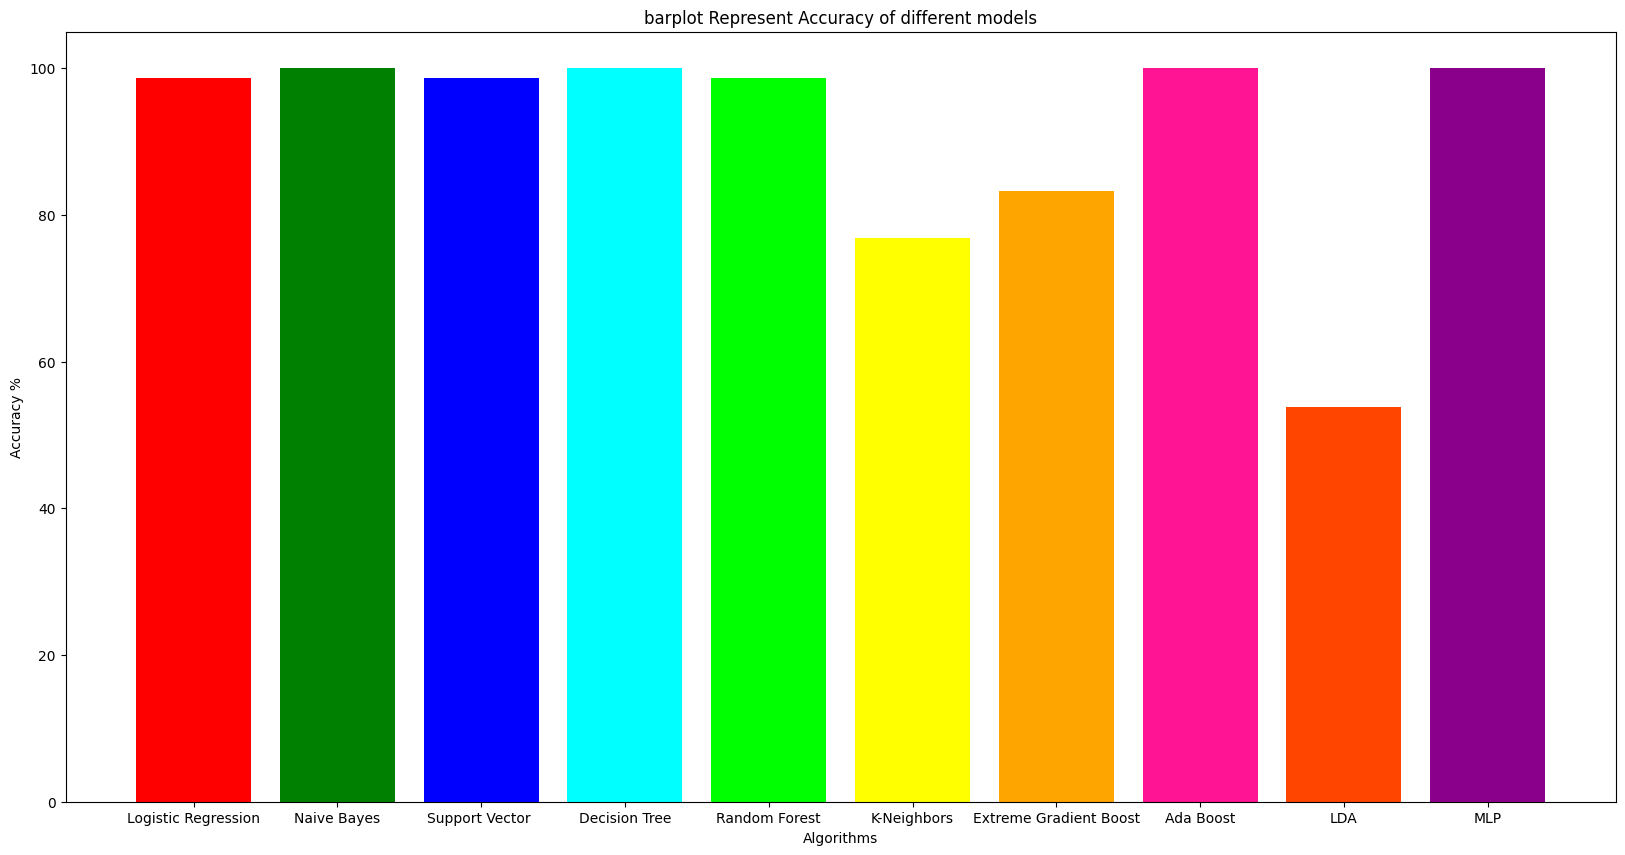

[                    Model    Accuracy
 0     Logistic Regression   98.717949
 1             Naive Bayes  100.000000
 2         Support Vector    98.717949
 3           Decision Tree  100.000000
 4           Random Forest   98.717949
 5             K-Neighbors   76.923077
 6  Extreme Gradient Boost   83.333333
 7               Ada Boost  100.000000
 8                     LDA   53.846154
 9                     MLP  100.000000,
 {'Logistic Regression': LogisticRegression(max_iter=5000),
  'Naive Bayes': GaussianNB(var_smoothing=1e-18),
  'Support Vector ': SVC(C=2),
  'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=32, random_state=0),
  'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=26, random_state=2),
  'K-Neighbors': KNeighborsClassifier(n_neighbors=16),
  'Extreme Gradient Boost': XGBClassifier(base_score=None, booster='dart', callbacks=None,
                colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
                e

In [85]:
data2 = filtermultiColumn(dataFrame,selected_features2)
Main(data2,selected_features2)